In [1]:
#Importing required libraries
import numpy as np
import pandas as pd

In [2]:
#Checkpoint 1
# 1. Reading rounds2 data to dataframe
rounds2 = pd.read_csv("C:/Users/hp/Desktop/PG - AI and ML/Assignment1/rounds2.csv",encoding = "ISO-8859-1")

#Pre processing data for getting unique records
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
#rounds2['company_permalink'] = rounds2['company_permalink'].str.strip()
rounds2['company_permalink']=rounds2.company_permalink.str.encode('UTF-8').str.decode('ascii','ignore')
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
total =rounds2['company_permalink'].size
unique_count = rounds2.company_permalink.nunique() 
print("Total company_permalink :",total)
print("Unique company_permalink :",unique_count)

Total company_permalink : 114949
Unique company_permalink : 66368


In [3]:
rounds2.head()

company_permalink  \
0                  /organization/-fame   
1               /organization/-qounter   
2               /organization/-qounter   
3  /organization/-the-one-of-them-inc-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015         10000000.0  
1                  A  14-10-2014                NaN  
2                NaN  01-03-2014           700000.0  
3                  B  30-01-2014          3406878.0  
4                  A  19-03-2008          2000000.0

In [4]:
#Checkpoint 1
# 2.Reading companies and rounds2 file and storing in dataframe

##Reading Companies data
companies = pd.read_csv("C:/Users/hp/Desktop/PG - AI and ML/Assignment1/companies.txt", sep="\t", encoding = "ISO-8859-1")

#Processing the companies data to get unique records
companies['permalink'] = companies['permalink'].str.lower()
#companies['permalink'] = companies['permalink'].str.strip()

companies['permalink']=companies.permalink.str.encode('UTF-8').str.decode('ascii','ignore')
companies['permalink']=companies['permalink'].str.lower()
total =companies['permalink'].size
unique_count = companies.permalink.nunique() 
print("total permalink:",total)
print("Unique permalink:",unique_count)



total permalink: 66368
Unique permalink: 66368


In [5]:
companies.head()

permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                /organization/0-6-com                 0-6.com   
4       /organization/004-technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                                        Curated Web  operating          CHN   
4                                           Software  operating          USA   

  state_code                 region           city  founded_at  
0         16                 Mumbai         Mumbai         NaN  
1         DE             DE - Other  Delaware City  04-09-2014  
2        NaN                    NaN            NaN         NaN  
3         22                Beijing        Beijing  01-01-2007  
4         IL  Springfield, Illinois      Champaign  01-01-2010

In [6]:
##Checkpoint 1
# 3.In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
companies.describe()

#Since all the values in permalink is unique it can be considered as unique key

permalink   name                homepage_url  \
count                    66368  66367                       61310   
unique                   66368  66102                       61191   
top     /organization/pluromed  Roost  http://www.askforoffer.com   
freq                         1      4                           5   

       category_list     status country_code state_code       region  \
count          63220      66368        59410      57821        58338   
unique         27296          4          137        311         1092   
top         Software  operating          USA         CA  SF Bay Area   
freq            3995      53034        37601      12900         8804   

                 city  founded_at  
count           58340       51147  
unique           5111        3978  
top     San Francisco  01-01-2012  
freq             3526        2730

In [7]:
#Checkpoint 1
#4.Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.
unique_count_permalink = companies.permalink.nunique() 
unique_count_company_permalink = rounds2.company_permalink.nunique() 
print("Unique number of companies in comapnies file is :" ,unique_count_permalink )
print("Unique number of companies in rounds2 file  is :" ,unique_count_company_permalink )

##since number of unique companies in rounds2 file is greater than companies file .It clearly means there are 
#comapnies in rounds2 which are not there in companies file

Unique number of companies in comapnies file is : 66368
Unique number of companies in rounds2 file  is : 66368


In [8]:
#Checkpoint 1
# Merging rounds2 and companies data frame  and getting total records.
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink',right_on='permalink')
print(master_frame.shape)

(114949, 16)


In [9]:
#Making sure  there are no  companies in the rounds2 file which are not  present in companies
master_frame.loc[master_frame['company_permalink'] != master_frame['permalink']]

Empty DataFrame
Columns: [company_permalink, funding_round_permalink, funding_round_type, funding_round_code, funded_at, raised_amount_usd, permalink, name, homepage_url, category_list, status, country_code, state_code, region, city, founded_at]
Index: []

In [10]:
#Checkpoint 2 
#Investment type analysis
#Data cleaning 
print(master_frame.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB
None


In [11]:
#Getting the null column wise
print(master_frame.isnull().sum())

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64


#Getting percentage of nulls column wise
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


In [12]:
# Dropping columns which are not required for analysis
master_frame = master_frame.drop(['funding_round_code','founded_at','region','city','homepage_url','state_code','funded_at'], axis=1)

#Getting percentage of null in existing columns
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
dtype: float64

In [13]:
#eleting all the nulls present in country_code,category_list,raised_amount_usd,name
master_frame = master_frame.dropna(axis=0, subset=['country_code','category_list','raised_amount_usd','name'])

In [14]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [15]:
print(master_frame.shape)

(88528, 9)


In [16]:
#Checkpoint 2
#Creating a temporary dataframe which contains only the 4 specified funding round types
funding_type=['seed','venture','private_equity','angel']
df_fundingtype = master_frame.loc[master_frame['funding_round_type'].isin(funding_type)]
df_fundingtype = df_fundingtype.groupby('funding_round_type')

In [17]:
pd.options.display.float_format = '{:.4f}'.format
#Getting Mean investment in each funding_round_type 
print(df_fundingtype.raised_amount_usd.mean())

funding_round_type
angel              971573.8911
private_equity   73938486.2753
seed               747827.9479
venture          11724222.6902
Name: raised_amount_usd, dtype: float64


#Clearly by looking at the mean the venture type is matching with constraints of spark funds

In [18]:
#Checkpoint 3 countries analysis
Venture_frame = master_frame.loc[master_frame['funding_round_type']=='venture',:]
df_by_country = Venture_frame.groupby('country_code')['raised_amount_usd'].sum()

In [19]:
top9 = pd.DataFrame(df_by_country).sort_values('raised_amount_usd',ascending=False)[0:9]
top9

raised_amount_usd
country_code                   
USA           420068029342.0000
CHN            39338918773.0000
GBR            20072813004.0000
IND            14261508718.0000
CAN             9482217668.0000
FRA             7226851352.0000
ISR             6854350477.0000
DEU             6306921981.0000
JPN             3167647127.0000

Refering to the link provided, we can say that the top3 countires in terms of total investments across Sectors are **USA,GBR,IND all having English as their official language, CHN should be dropped as english is not official language .**

In [20]:
##checkpoint 4
#There was a warning for settingwithcopy, so making the mode of chained assigments as NONE
pd.options.mode.chained_assignment = None
Venture_frame['primary_sector'] = Venture_frame.category_list.str.split('|').str[0]

In [21]:
#Reading Mapping file
mapping = pd.read_csv("C:/Users/hp/Desktop/PG - AI and ML/Assignment1/mapping.csv", encoding = "ISO-8859-1")

In [22]:
mapping.head()

category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
0            NaN                    0       1                           0   
1             3D                    0       0                           0   
2    3D Printing                    0       0                           0   
3  3D Technology                    0       0                           0   
4     Accounting                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
0              0       0              0                           0       0   
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   

   Social, Finance, Analytics, Advertising  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        1

In [23]:
mapping.category_list.describe()

count                    687
unique                   687
top       Social Bookmarking
freq                       1
Name: category_list, dtype: object

In [24]:
mapping_new = mapping.melt(id_vars=['category_list'])

In [25]:
mapping_new.shape

(6192, 3)

In [26]:
# Deleting null values present in category list
mapping_new = mapping_new.dropna(axis=0, subset=['category_list'])

In [27]:
mapping_new.shape

(6183, 3)

In [28]:
mapping_new.head()

category_list             variable  value
1                3D  Automotive & Sports      0
2       3D Printing  Automotive & Sports      0
3     3D Technology  Automotive & Sports      0
4        Accounting  Automotive & Sports      0
5  Active Lifestyle  Automotive & Sports      0

Keeping the category list and variable  wherever the value is 1

In [29]:
mapping_new = mapping_new.loc[mapping_new['value']== 1,:]

In [30]:
mapping_new.head()

category_list             variable  value
8   Adventure Travel  Automotive & Sports      1
14         Aerospace  Automotive & Sports      1
45              Auto  Automotive & Sports      1
46   Automated Kiosk  Automotive & Sports      1
47        Automotive  Automotive & Sports      1

In [31]:
mapping_new.shape

(687, 3)

In [32]:
#There is some spelling mistakes present in category list column like instead of 
# 1.nanotechnology --> 0notechnology
# 2.Natural Language Processing --> 0tural Language Processing etc so replacing 0 with na in category list column

mapping_new['category_list'] = mapping_new['category_list'].apply(lambda x: str(x).replace('0','na'))

#mapping_new.to_csv('mapping_new.csv')

#After writing the datframe to csv file and checking the category list name . 
#I have observed  Enterprise 2.0 is now Enterprise 2.na
#so now replacing .na with .0

mapping_new['category_list'] = mapping_new['category_list'].apply(lambda x: str(x).replace('.na','.0'))




In [33]:
master_mapping = pd.merge(Venture_frame, mapping_new, how='inner', left_on='primary_sector',right_on='category_list')

In [34]:
master_mapping.head()

company_permalink  \
0            /organization/-fame   
1            /organization/90min   
2            /organization/90min   
3            /organization/90min   
4  /organization/all-def-digital   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6            venture   
2  /funding-round/bd626ed022f5c66574b1afe234f3c90d            venture   
3  /funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810            venture   
4  /funding-round/452a2342fe720285c3b92e9bd927d9ba            venture   

   raised_amount_usd                      permalink             name  \
0      10000000.0000            /organization/-fame            #fame   
1      15000000.0000            /organization/90min            90min   
2       5800000.0000            /organization/90min            90min   
3      18000000.0000            /organization/90min            90min   
4       5000000.0000  /organization/all-def-digital  All Def Digital   

                       category_list_x     status country_code primary_sector  \
0                                Media  operating          IND          Media   
1  Media|News|Publishing|Soccer|Sports  operating          GBR          Media   
2  Media|News|Publishing|Soccer|Sports  operating          GBR          Media   
3  Media|News|Publishing|Soccer|Sports  operating          GBR          Media   
4                                Media  operating          USA          Media   

  category_list_y       variable  value  
0           Media  Entertainment      1  
1           Media  Entertainment      1  
2           Media  Entertainment      1  
3           Media  Entertainment      1  
4           Media  Entertainment      1

In [35]:
master_mapping.shape

(47626, 13)

In [36]:
# Renaming variable column to  main sector
master_mapping = master_mapping.rename(columns = {"variable": "main_sector"}) 

In [37]:
master_mapping.head()

company_permalink  \
0            /organization/-fame   
1            /organization/90min   
2            /organization/90min   
3            /organization/90min   
4  /organization/all-def-digital   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6            venture   
2  /funding-round/bd626ed022f5c66574b1afe234f3c90d            venture   
3  /funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810            venture   
4  /funding-round/452a2342fe720285c3b92e9bd927d9ba            venture   

   raised_amount_usd                      permalink             name  \
0      10000000.0000            /organization/-fame            #fame   
1      15000000.0000            /organization/90min            90min   
2       5800000.0000            /organization/90min            90min   
3      18000000.0000            /organization/90min            90min   
4       5000000.0000  /organization/all-def-digital  All Def Digital   

                       category_list_x     status country_code primary_sector  \
0                                Media  operating          IND          Media   
1  Media|News|Publishing|Soccer|Sports  operating          GBR          Media   
2  Media|News|Publishing|Soccer|Sports  operating          GBR          Media   
3  Media|News|Publishing|Soccer|Sports  operating          GBR          Media   
4                                Media  operating          USA          Media   

  category_list_y    main_sector  value  
0           Media  Entertainment      1  
1           Media  Entertainment      1  
2           Media  Entertainment      1  
3           Media  Entertainment      1  
4           Media  Entertainment      1

In [38]:
#Checking whether primary_sector and category_list_y values are same or different .
#If it same for all then will get rid of category_list_y and rename category_list_x to category_list
master_mapping.loc[master_mapping['primary_sector'] != master_mapping['category_list_y']]


Empty DataFrame
Columns: [company_permalink, funding_round_permalink, funding_round_type, raised_amount_usd, permalink, name, category_list_x, status, country_code, primary_sector, category_list_y, main_sector, value]
Index: []

In [39]:
#since primary_sector and  category_list_y are all same so dropping category_list_y
master_mapping = master_mapping.drop('category_list_y',axis=1)


In [40]:
master_mapping= master_mapping.rename(columns = {"category_list_x": "category_list"})

In [41]:
master_mapping.head()


company_permalink  \
0            /organization/-fame   
1            /organization/90min   
2            /organization/90min   
3            /organization/90min   
4  /organization/all-def-digital   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6            venture   
2  /funding-round/bd626ed022f5c66574b1afe234f3c90d            venture   
3  /funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810            venture   
4  /funding-round/452a2342fe720285c3b92e9bd927d9ba            venture   

   raised_amount_usd                      permalink             name  \
0      10000000.0000            /organization/-fame            #fame   
1      15000000.0000            /organization/90min            90min   
2       5800000.0000            /organization/90min            90min   
3      18000000.0000            /organization/90min            90min   
4       5000000.0000  /organization/all-def-digital  All Def Digital   

                         category_list     status country_code primary_sector  \
0                                Media  operating          IND          Media   
1  Media|News|Publishing|Soccer|Sports  operating          GBR          Media   
2  Media|News|Publishing|Soccer|Sports  operating          GBR          Media   
3  Media|News|Publishing|Soccer|Sports  operating          GBR          Media   
4                                Media  operating          USA          Media   

     main_sector  value  
0  Entertainment      1  
1  Entertainment      1  
2  Entertainment      1  
3  Entertainment      1  
4  Entertainment      1

**Checkpoint 5 - Sector Analysis**


In [42]:
#let's filter data for raised amount usd between 5 million USD to 15 million USD
Checkpoint_5 = master_mapping[(master_mapping['raised_amount_usd'] >= 5000000.0) & (master_mapping['raised_amount_usd'] <= 15000000.0)]

In [43]:
Checkpoint_5.head()

company_permalink  \
0               /organization/-fame   
1               /organization/90min   
2               /organization/90min   
4     /organization/all-def-digital   
11  /organization/basel-switzerland   

                            funding_round_permalink funding_round_type  \
0   /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1   /funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6            venture   
2   /funding-round/bd626ed022f5c66574b1afe234f3c90d            venture   
4   /funding-round/452a2342fe720285c3b92e9bd927d9ba            venture   
11  /funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2            venture   

    raised_amount_usd                        permalink               name  \
0       10000000.0000              /organization/-fame              #fame   
1       15000000.0000              /organization/90min              90min   
2        5800000.0000              /organization/90min              90min   
4        5000000.0000    /organization/all-def-digital    All Def Digital   
11      13439178.0000  /organization/basel-switzerland  The Speedel Group   

                          category_list     status country_code  \
0                                 Media  operating          IND   
1   Media|News|Publishing|Soccer|Sports  operating          GBR   
2   Media|News|Publishing|Soccer|Sports  operating          GBR   
4                                 Media  operating          USA   
11                                Media     closed          CHE   

   primary_sector    main_sector  value  
0           Media  Entertainment      1  
1           Media  Entertainment      1  
2           Media  Entertainment      1  
4           Media  Entertainment      1  
11          Media  Entertainment      1

In [44]:
Checkpoint_5['raised_amount_usd'].describe()

count      15708.0000
mean     8891582.8656
std      3057626.0130
min      5000000.0000
25%      6000000.0000
50%      8297499.5000
75%     11000000.0000
max     15000000.0000
Name: raised_amount_usd, dtype: float64

In [45]:
D1 = Checkpoint_5.loc[Checkpoint_5['country_code'] =='USA']
D2 = Checkpoint_5.loc[Checkpoint_5['country_code'] =='GBR']
D3 = Checkpoint_5.loc[Checkpoint_5['country_code'] =='IND']

In [46]:
print(D1.shape)
print(D2.shape)
print(D3.shape)

(12012, 12)
(619, 12)
(328, 12)


In [47]:
D1.head()

company_permalink  \
4   /organization/all-def-digital   
16       /organization/chefs-feed   
24   /organization/huffingtonpost   
25   /organization/huffingtonpost   
33        /organization/matchmine   

                            funding_round_permalink funding_round_type  \
4   /funding-round/452a2342fe720285c3b92e9bd927d9ba            venture   
16  /funding-round/adca195749ae9ace84684723fbe75e5b            venture   
24  /funding-round/7f05940c4d2dfecb8e50a0e5720e5065            venture   
25  /funding-round/9241ae16e08df17ebdc064e49e23035a            venture   
33  /funding-round/41ac526630da57ad6eb9d02431b17657            venture   

    raised_amount_usd                      permalink                 name  \
4        5000000.0000  /organization/all-def-digital      All Def Digital   
16       5000000.0000       /organization/chefs-feed            ChefsFeed   
24       5000000.0000   /organization/huffingtonpost  The Huffington Post   
25       5000000.0000   /organization/huffingtonpost  The Huffington Post   
33      10000000.0000        /organization/matchmine            MatchMine   

                             category_list     status country_code  \
4                                    Media  operating          USA   
16     Media|Mobile|Restaurants|Technology  operating          USA   
24                   Media|News|Publishing   acquired          USA   
25                   Media|News|Publishing   acquired          USA   
33  Media|News|Reviews and Recommendations     closed          USA   

   primary_sector    main_sector  value  
4           Media  Entertainment      1  
16          Media  Entertainment      1  
24          Media  Entertainment      1  
25          Media  Entertainment      1  
33          Media  Entertainment      1

In [48]:
D1.country_code.describe()

count     12012
unique        1
top         USA
freq      12012
Name: country_code, dtype: object

In [49]:
#Converting the column 'value' of all the three dataframes (D1,D2,D3) to integer type for  calculations
D1.value = D1.value.astype(int)
D2.value = D2.value.astype(int)
D3.value = D3.value.astype(int)

In [50]:
#Calculating total number (or count) of investments for each main sector in a separate column
D1['total_count_investment'] = D1.groupby('main_sector')['value'].transform('sum')
D2['total_count_investment'] = D2.groupby('main_sector')['value'].transform('sum')
D3['total_count_investment'] = D3.groupby('main_sector')['value'].transform('sum')

In [51]:
#Calculating total amount invested in each main sector in a separate column
D1['total_amount_invested'] = D1.groupby('main_sector')['raised_amount_usd'].transform('sum')
D2['total_amount_invested'] = D2.groupby('main_sector')['raised_amount_usd'].transform('sum')
D3['total_amount_invested'] = D3.groupby('main_sector')['raised_amount_usd'].transform('sum')


In [52]:
#Total number of Investments (count) main_sector wise for D1
D1.groupby('main_sector')['total_count_investment'].sum()

main_sector
Automotive & Sports                          27889
Cleantech / Semiconductors                 5290000
Entertainment                               349281
Health                                      826281
Manufacturing                               638401
News, Search and Messaging                 2502724
Others                                     8702500
Social, Finance, Analytics, Advertising    7365796
Name: total_count_investment, dtype: int32

In [53]:
#Total amount of investment main_sector wise for D1
D1.groupby('main_sector')['total_amount_invested'].sum()

main_sector
Automotive & Sports                         242835428287.0000
Cleantech / Semiconductors                48775244841600.0000
Entertainment                              3013626007362.0000
Health                                     7464580155513.0000
Manufacturing                              5799584149022.0000
News, Search and Messaging                22084035671096.0000
Others                                    77646970655900.0000
Social, Finance, Analytics, Advertising   64613221080296.0000
Name: total_amount_invested, dtype: float64

In [54]:
#Total number of Investments (count) main_sector wise for D2
D2.groupby('main_sector')['total_count_investment'].sum()

main_sector
Automotive & Sports                          256
Cleantech / Semiconductors                 16384
Entertainment                               3136
Health                                       576
Manufacturing                               1764
News, Search and Messaging                  5329
Others                                     21609
Social, Finance, Analytics, Advertising    17689
Name: total_count_investment, dtype: int32

In [55]:
##Total amount of investment main_sector wise for D2
D2.groupby('main_sector')['total_amount_invested'].sum()

main_sector
Automotive & Sports                         2672825040.0000
Cleantech / Semiconductors                147217877120.0000
Entertainment                              27035942472.0000
Health                                      5148900240.0000
Manufacturing                              15201494070.0000
News, Search and Messaging                 44949475155.0000
Others                                    188692770483.0000
Social, Finance, Analytics, Advertising   144890733862.0000
Name: total_amount_invested, dtype: float64

In [56]:
#Total number of Investments (count) main_sector wise for D3
D3.groupby('main_sector')['total_count_investment'].sum()

main_sector
Automotive & Sports                          169
Cleantech / Semiconductors                   400
Entertainment                               1089
Health                                       361
Manufacturing                                441
News, Search and Messaging                  2704
Others                                     12100
Social, Finance, Analytics, Advertising     3600
Name: total_count_investment, dtype: int32

In [57]:
##Total amount of investment main_sector wise for D3
D3.groupby('main_sector')['total_amount_invested'].sum()

main_sector
Automotive & Sports                         1779700000.0000
Cleantech / Semiconductors                  3307600000.0000
Entertainment                               9267390000.0000
Health                                      3187060000.0000
Manufacturing                               4218900000.0000
News, Search and Messaging                 22559396340.0000
Others                                    111475045770.0000
Social, Finance, Analytics, Advertising    33032973000.0000
Name: total_amount_invested, dtype: float64

**Counting the total number of investments across all the Sectors in D1**

In [58]:
D1[['main_sector','total_count_investment']].drop_duplicates()['total_count_investment'].sum()

12012

**Counting the total number of investments across all the Sectors in D2**

In [59]:
D2[['main_sector','total_count_investment']].drop_duplicates()['total_count_investment'].sum()

619

**Counting the total number of investments across all the Sectors in D2**

In [60]:
D3[['main_sector','total_count_investment']].drop_duplicates()['total_count_investment'].sum()

328

*** Calculating Total amount of investements in D1 ***

In [61]:
D1[['main_sector','total_amount_invested']].drop_duplicates()['total_amount_invested'].sum()

107318294664.0

 ***Calculating Total amount of investements in D2 ***

In [62]:
D2[['main_sector','total_amount_invested']].drop_duplicates()['total_amount_invested'].sum()

5365228300.0

 ***Calculating Total amount of investements in D3 ***

In [63]:
D3[['main_sector','total_amount_invested']].drop_duplicates()['total_amount_invested'].sum()

2949543602.0

In [64]:
#Getting the total number of investments in each sector for D1(USA)

D1.groupby('main_sector')['total_count_investment'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: total_count_investment, dtype: int64

In [65]:
##Getting the total number of investments in each sector for D2
D2.groupby('main_sector')['total_count_investment'].count().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: total_count_investment, dtype: int64

In [66]:
##Getting the total number of investments in each sector for D2
D3.groupby('main_sector')['total_count_investment'].count().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: total_count_investment, dtype: int64

In [67]:
#Getting the Compnay which recieved the Highest investment in the Sector 'Others' (Top-Sector) for Country 1 (USA)
pd.DataFrame(D1[D1.main_sector=='Others'].sort_values('raised_amount_usd',ascending=False))[['name','raised_amount_usd']].head(1)

name  raised_amount_usd
15160  Infineta Systems      15000000.0000

In [68]:
##Getting the Compnay which recieved the Highest investment in the Sector 'Others' (Top-Sector) for Country 2 (GBR)
pd.DataFrame(D2[D2.main_sector=='Others'].sort_values('raised_amount_usd',ascending=False))[['name','raised_amount_usd']].head(1)

name  raised_amount_usd
17234  Tribold      15000000.0000

In [69]:
##Getting the Compnay which recieved the Highest investment in the Sector 'Others' (Top-Sector) for Country 3 (IND)
pd.DataFrame(D3[D3.main_sector=='Others'].sort_values('raised_amount_usd',ascending=False))[['name','raised_amount_usd']].head(1)

name  raised_amount_usd
38772  CommonFloor      15000000.0000

In [70]:
#Getting the Company which recieved the Highest investment in the Sector Social, Finance, Analytics, Advertising(second best) 
#for Country 1 (USA)
pd.DataFrame(D1[D1.main_sector=='Social, Finance, Analytics, Advertising'].sort_values('raised_amount_usd',ascending=False))[['name','raised_amount_usd']].head(1)

name  raised_amount_usd
9190  PowerReviews      15000000.0000

In [71]:
##Getting the Company which recieved the Highest investment in the second best sectorvfor Country 2 (GBR)
pd.DataFrame(D2[D2.main_sector=='Cleantech / Semiconductors'].sort_values('raised_amount_usd',ascending=False))[['name','raised_amount_usd']].head(1)

name  raised_amount_usd
34210  Elixent      15000000.0000

In [72]:
##Getting the Company which recieved the Highest investment in the second best sectorvfor Country 2 (GBR)
pd.DataFrame(D3[D3.main_sector=='Social, Finance, Analytics, Advertising'].sort_values('raised_amount_usd',ascending=False))[['name','raised_amount_usd']].head(1)

name  raised_amount_usd
26724  Shiram Credit      15000000.0000

****Checkpoint 6 ****

In [73]:
#filtering out the data for 3 funding types to create plot
import matplotlib.pyplot as plt
funding_types = ['seed','venture','private_equity',]
df_plot1 = master_frame.loc[master_frame['funding_round_type'].isin(funding_types)]

In [74]:
df_plot1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70723 entries, 0 to 114947
Data columns (total 9 columns):
company_permalink          70723 non-null object
funding_round_permalink    70723 non-null object
funding_round_type         70723 non-null object
raised_amount_usd          70723 non-null float64
permalink                  70723 non-null object
name                       70723 non-null object
category_list              70723 non-null object
status                     70723 non-null object
country_code               70723 non-null object
dtypes: float64(1), object(8)
memory usage: 5.4+ MB


In [75]:
#Getting the mean value for amount raised for each funding type
mean =  df_plot1.groupby('funding_round_type')['raised_amount_usd'].mean()
mean

funding_round_type
private_equity   73938486.2753
seed               747827.9479
venture          11724222.6902
Name: raised_amount_usd, dtype: float64

In [76]:
(df_plot1.groupby('funding_round_type')['raised_amount_usd'].sum()/master_frame.raised_amount_usd.sum())*100



funding_round_type
private_equity   14.5128
seed              1.7013
venture          60.4508
Name: raised_amount_usd, dtype: float64

In [77]:
#Storing the percentage value of the amount raised in each funding type , depicitng the fraction of the total investemnt

fraction_investment = (df_plot1.groupby('funding_round_type')['raised_amount_usd'].sum()/master_frame.raised_amount_usd.sum())*100

In [78]:
fraction_investment

funding_round_type
private_equity   14.5128
seed              1.7013
venture          60.4508
Name: raised_amount_usd, dtype: float64

([<matplotlib.patches.Wedge at 0xbc4b048>,
 [Text(-0.6162938450855735, 0.9111431811244813, 'private_equity'),
  Text(-1.0470066376265712, 0.3373086135364792, 'seed'),
  Text(0.6782650879009349, -0.8660002716712837, 'venture')],
 [Text(-0.3361602791375855, 0.4969871897042625, '18.9%'),
  Text(-0.5710945296144934, 0.18398651647444317, '2.2%'),
  Text(0.36996277521869175, -0.47236378454797284, '78.9%')])

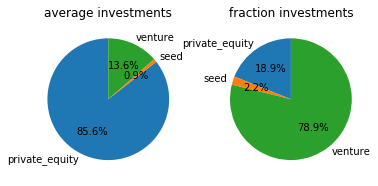

In [79]:
##Creationg two PIE CHARTS as subplots in a single plot, to depict the Average/Fraction Investment of the amount invested in
#each of the 3 funding types

plt.figure(1)
plt.subplot(121)
plt.title('average investments')
plt.pie(mean,labels= mean.index,startangle=90,autopct='%.1f%%')
plt.subplot(122)
plt.title('fraction investments')
plt.pie(fraction_investment,labels=fraction_investment.index,startangle=90,autopct='%.1f%%')

In [80]:
#Top 9 countries according to invested  amount 
top9

raised_amount_usd
country_code                   
USA           420068029342.0000
CHN            39338918773.0000
GBR            20072813004.0000
IND            14261508718.0000
CAN             9482217668.0000
FRA             7226851352.0000
ISR             6854350477.0000
DEU             6306921981.0000
JPN             3167647127.0000

In [81]:
#Getting the country names from the top9 dataframe as index
top9.index

Index(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN'], dtype='object', name='country_code')

<BarContainer object of 9 artists>

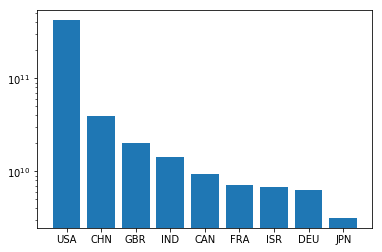

In [82]:
#Plotting the countries vs the total amount invested, in order to achieve the top 3 countries
#As USA,CHN,GBR, but as the case with CHN, Official language not being English, we get IND as our third country

plt.bar(top9.index,height=top9.raised_amount_usd,log=True)

In [83]:
#Getting the top 3 Sectors in top 3 countries based on the total number of investments
#Top 3 sector for USA
D1_top3 = D1.groupby(['country_code','main_sector']).agg({'total_count_investment':'count'})
D1_top3_temp = D1_top3['total_count_investment'].groupby(level=0, group_keys=False)
D1_top_3_sectors = pd.DataFrame(D1_top3_temp.apply(lambda x: x.sort_values(ascending=False).head(3)))
D1_top_3_sectors

total_count_investment
country_code main_sector                                                    
USA          Others                                                     2950
             Social, Finance, Analytics, Advertising                    2714
             Cleantech / Semiconductors                                 2300

In [84]:
#Top3 sectors for GBR

D2_top3 = D2.groupby(['country_code','main_sector']).agg({'total_count_investment':'count'})
D2_top3_temp = D2_top3['total_count_investment'].groupby(level=0, group_keys=False)
D2_top_3_sectors = pd.DataFrame(D2_top3_temp.apply(lambda x: x.sort_values(ascending=False).head(3)))
D2_top_3_sectors

total_count_investment
country_code main_sector                                                    
GBR          Others                                                      147
             Social, Finance, Analytics, Advertising                     133
             Cleantech / Semiconductors                                  128

In [85]:
#Top3 sectors for IND

D3_top3 = D3.groupby(['country_code','main_sector']).agg({'total_count_investment':'count'})
D3_top3_temp = D3_top3['total_count_investment'].groupby(level=0, group_keys=False)
D3_top_3_sectors = pd.DataFrame(D3_top3_temp.apply(lambda x: x.sort_values(ascending=False).head(3)))
D3_top_3_sectors

total_count_investment
country_code main_sector                                                    
IND          Others                                                      110
             Social, Finance, Analytics, Advertising                      60
             News, Search and Messaging                                   52

In [86]:
#Combining the three dataframes into one to build the plot

DF_Top3_SC = D1_top_3_sectors.append([D2_top_3_sectors, D3_top_3_sectors])
DF_Top3_SC

total_count_investment
country_code main_sector                                                    
USA          Others                                                     2950
             Social, Finance, Analytics, Advertising                    2714
             Cleantech / Semiconductors                                 2300
GBR          Others                                                      147
             Social, Finance, Analytics, Advertising                     133
             Cleantech / Semiconductors                                  128
IND          Others                                                      110
             Social, Finance, Analytics, Advertising                      60
             News, Search and Messaging                                   52

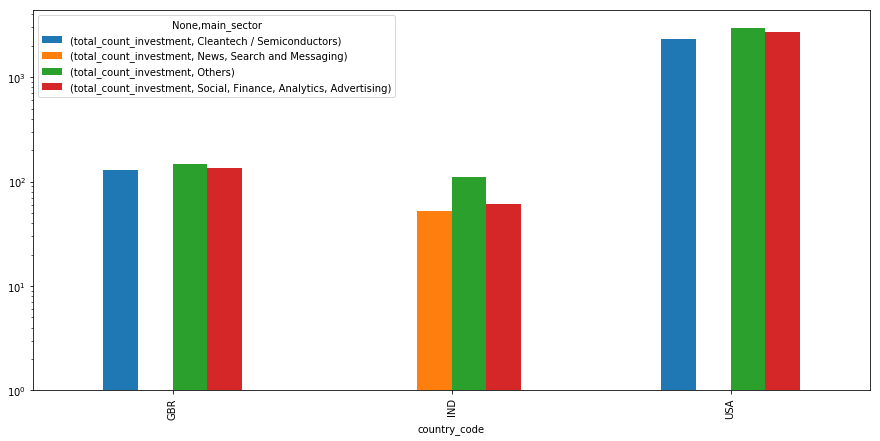

In [87]:
#A bar chart with top 3 Sectors and top 3 Countries based on the total number of investmemnts made in each Sector

fig, ax = plt.subplots(figsize=(15,7))
DF_Top3_SC.unstack().plot(ax=ax,kind='bar',log=True)